# Bike Sharing & NN
In this project the goal is to design an NN to predict the number of Bike needed to run a company of bikes.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rides = pd.read_csv('hour.csv')

## EDA

In [4]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# checking null values
rides.isna().sum(), rides.isnull().sum(), 

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64, instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [9]:
# shape
print(rides.shape)

(17379, 17)


In [11]:
# types
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
rides_vis = rides.drop(['instant','dteday'], axis = 1)

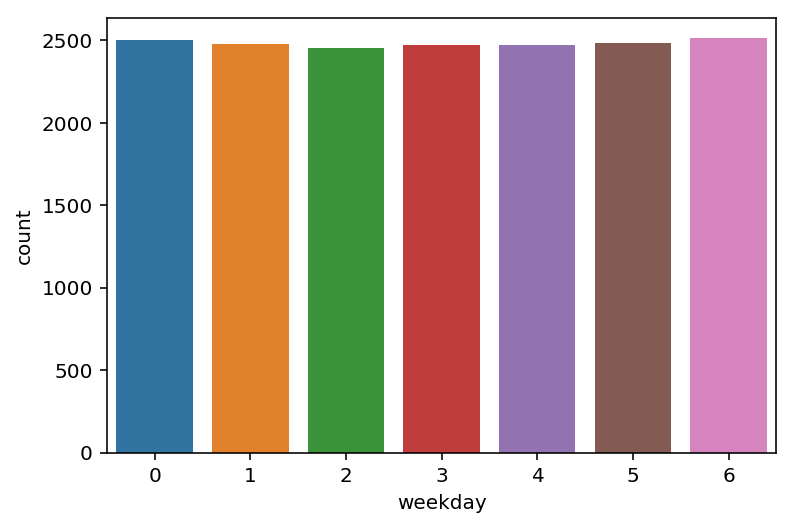

In [14]:
sns.countplot(x='weekday', data=rides_vis);

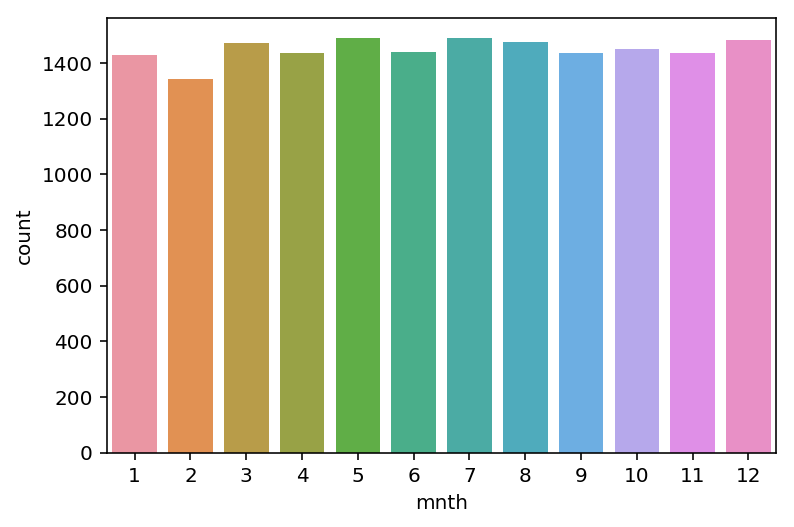

In [15]:
sns.countplot(x='mnth', data=rides_vis);

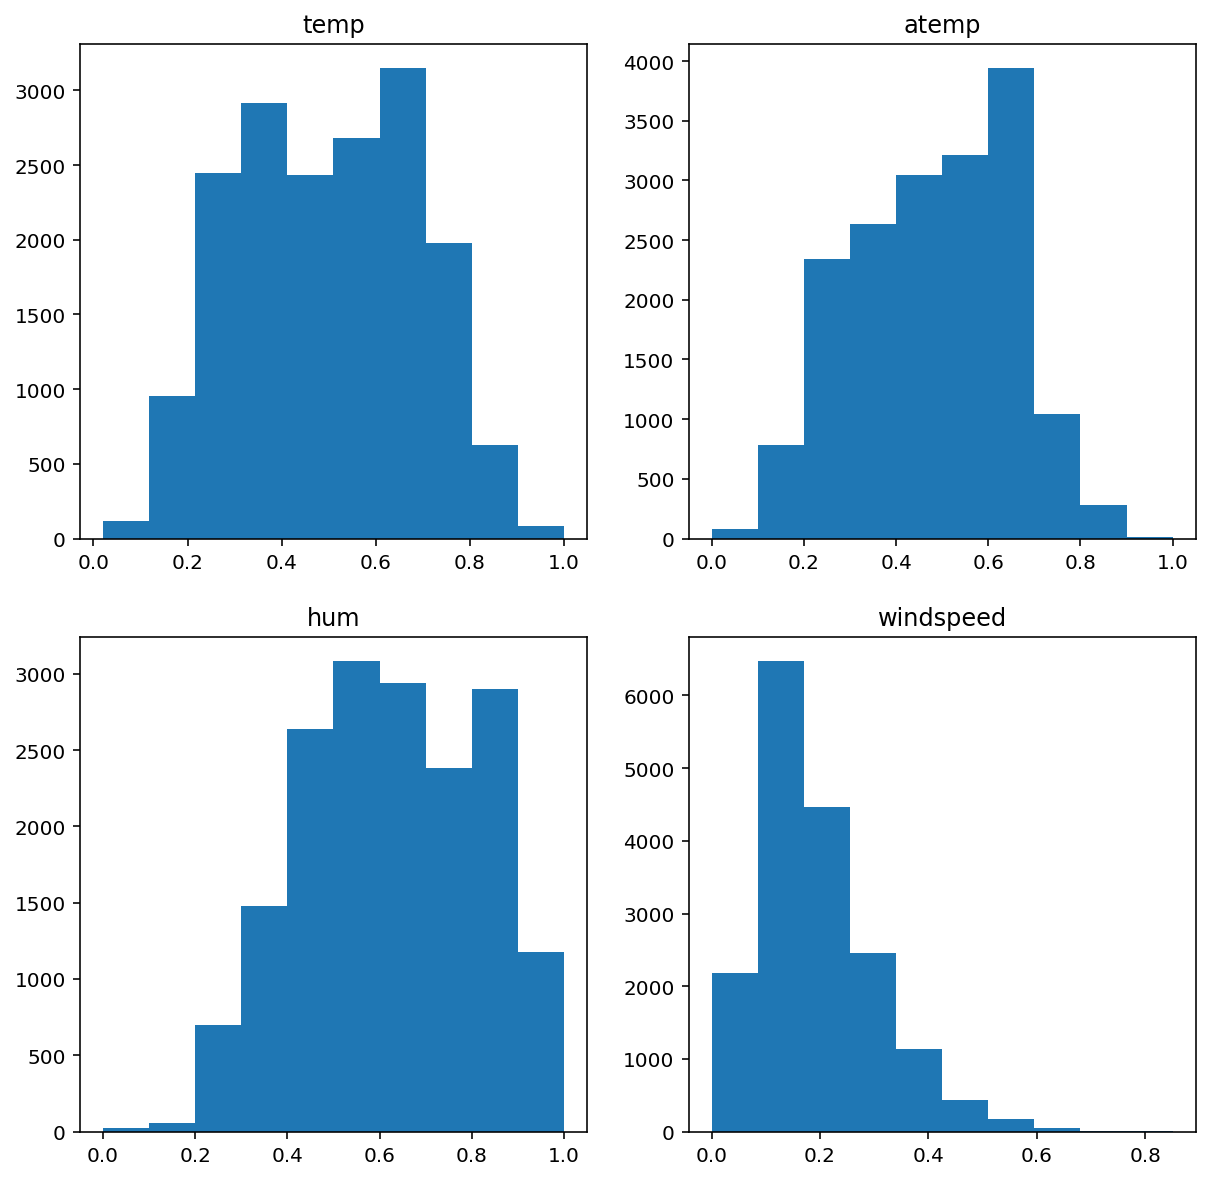

In [22]:
hist_column = ['temp', 'atemp', 'hum', 'windspeed']
fig = plt.figure(figsize= (10,10))
for i, column in enumerate(hist_column):
    ax = fig.add_subplot(2,2, i+1)
    ax.hist(rides_vis[column])
    ax.set_title(column)

## Preprocessing

In [23]:
# droppin unnecesarry column
rides_model = rides.drop(['instant','dteday', 'yr'], axis = 1)

In [29]:
X = rides_model.iloc[:,:-1]
y = rides_model.iloc[:,-1]

In [30]:
# splitting the data into test & train subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model Building

In [27]:
# trying simple linear regression
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# testing
y_pred = regressor.predict(x_test)

In [38]:
regressor.score(x_test, y_test)

1.0

As we can see just simple linear regression was able to achieve high performence, not just high but the perfect performance

In [51]:
## Making Neural net with keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss = 'mean_absolute_percentage_error', optimizer = 'adam')

In [65]:
model.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
13903/13903 [==============================] - 4s 252us/step - loss: 19.1520
Epoch 2/50
13903/13903 [==============================] - 1s 104us/step - loss: 0.8636
Epoch 3/50
13903/13903 [==============================] - 2s 109us/step - loss: 0.4322
Epoch 4/50
13903/13903 [==============================] - 2s 125us/step - loss: 0.3176
Epoch 5/50
13903/13903 [==============================] - 2s 117us/step - loss: 0.2926
Epoch 6/50
13903/13903 [==============================] - 2s 110us/step - loss: 0.2461
Epoch 7/50
13903/13903 [==============================] - 2s 113us/step - loss: 0.1896
Epoch 8/50
13903/13903 [==============================] - 2s 127us/step - loss: 0.1825
Epoch 9/50
13903/13903 [==============================] - 2s 111us/step - loss: 0.1703
Epoch 10/50
13903/13903 [==============================] - 1s 107us/step - loss: 0.1502
Epoch 11/50
13903/13903 [==============================] - 2s 110us/step - loss: 0.1530
Epoch 12/50
13903/13903 [===============

In [66]:
ypred = model.predict(x_test)

In [75]:
y_good = ypred.reshape(1, 3476)[0]

In [77]:
from sklearn.metrics import r2_score

In [78]:
score = r2_score(y_test,y_good)
print(score)

0.9999877305241048


we can see also that neural networks achieve a great performance with 0.99998 as R2 score. and this happen when we try complex solution to simple problem, like the following picture describe it.


![Meme Photo](http://devhumor.com/content/uploads/images/January2019/deep_learning.jpg)